In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame(pd.read_csv("acoustic_Features.csv"))
X = df.drop(["Class"], axis = 1)
y = df["Class"]

In [3]:
df.columns

Index(['Class', '_RMSenergy_Mean', '_Lowenergy_Mean', '_Fluctuation_Mean',
       '_Tempo_Mean', '_MFCC_Mean_1', '_MFCC_Mean_2', '_MFCC_Mean_3',
       '_MFCC_Mean_4', '_MFCC_Mean_5', '_MFCC_Mean_6', '_MFCC_Mean_7',
       '_MFCC_Mean_8', '_MFCC_Mean_9', '_MFCC_Mean_10', '_MFCC_Mean_11',
       '_MFCC_Mean_12', '_MFCC_Mean_13', '_Roughness_Mean', '_Roughness_Slope',
       '_Zero-crossingrate_Mean', '_AttackTime_Mean', '_AttackTime_Slope',
       '_Rolloff_Mean', '_Eventdensity_Mean', '_Pulseclarity_Mean',
       '_Brightness_Mean', '_Spectralcentroid_Mean', '_Spectralspread_Mean',
       '_Spectralskewness_Mean', '_Spectralkurtosis_Mean',
       '_Spectralflatness_Mean', '_EntropyofSpectrum_Mean',
       '_Chromagram_Mean_1', '_Chromagram_Mean_2', '_Chromagram_Mean_3',
       '_Chromagram_Mean_4', '_Chromagram_Mean_5', '_Chromagram_Mean_6',
       '_Chromagram_Mean_7', '_Chromagram_Mean_8', '_Chromagram_Mean_9',
       '_Chromagram_Mean_10', '_Chromagram_Mean_11', '_Chromagram_Mean_12

In [4]:
accuracy_list = []
f1_list = []
recall_list = []
precision_list = []


kfold = KFold(n_splits=10, shuffle=True)
df_model = GaussianNB()

for i in range(10):
    accuracy_list.append(cross_val_score(df_model, X, y, cv = kfold, scoring=(make_scorer(accuracy_score))).mean())
    f1_list.append(cross_val_score(df_model, X, y, cv = kfold, scoring=(make_scorer(f1_score, average = "weighted"))).mean())
    recall_list.append(cross_val_score(df_model, X, y, cv = kfold, scoring=(make_scorer(recall_score, average = "weighted"))).mean())
    precision_list.append(cross_val_score(df_model, X, y, cv = kfold, scoring=(make_scorer(precision_score, average = "weighted"))).mean())
    


In [5]:
accuracy_list

[0.6775,
 0.6875,
 0.6875,
 0.6950000000000001,
 0.69,
 0.69,
 0.6799999999999999,
 0.6825,
 0.6925,
 0.675]

In [6]:
total_accuracy = 0
avg_accuracy = 0

for i in accuracy_list:
    total_accuracy += i

avg_accuracy = total_accuracy / 10
avg_accuracy

0.68575

In [7]:
total_f1 = 0
avg_f1 = 0

for i in f1_list:
    total_f1 += i

avg_f1 = total_f1 / 10
avg_f1

0.6745757233006863

In [8]:
total_precision = 0
avg_precision = 0

for i in precision_list:
    total_precision += i

avg_precision = total_precision / 10
avg_precision

0.7068917214235713

In [9]:
total_recall = 0
avg_recall = 0

for i in recall_list:
    total_recall += i

avg_recall = total_recall / 10
avg_recall

0.685

Text(0.5, 1.0, 'Results')

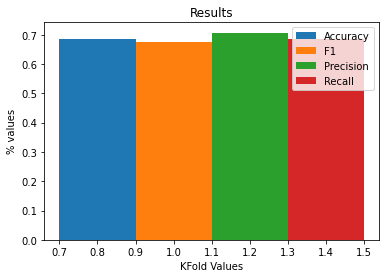

In [10]:
x_index = 1
en = 0.20

fig = plt.figure()
ax = plt.axes()

plt.bar(x_index-en, avg_accuracy, width=en, label = "Accuracy")
plt.bar(x_index, avg_f1, width=en, label = "F1")
plt.bar(x_index+en, avg_precision, width=en, label = "Precision")
plt.bar(x_index+2*en, avg_recall, width=en, label = "Recall")

plt.legend()

plt.xlabel("KFold Values")
plt.ylabel("% values")
plt.title("Results")